In [2]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup

url = 'https://www.bestbuy.com/site/mobile-cell-phones/all-cell-phones/pcmcat1625163553254.c?id=pcmcat1625163553254'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

links = soup.find_all('h4', class_='sku-title')
phones = soup.find_all('div', class_='c-ratings-reviews')

data = []
for link, phone in zip(links, phones):
    title = link.get_text(strip=True)
    href = link.find('a')['href']
    reviews_info = phone.find('p').get_text(strip=True)

    rating_match = re.search(r'Rating (\d+\.\d+)', reviews_info)
    rating = rating_match.group(1) if rating_match else None

    reviews_match = re.search(r'(\d+) reviews?$', reviews_info)
    reviews = reviews_match.group(1) if reviews_match else None

    brand = title.split('-')[0].strip()
    product_title = '-'.join(title.split('-')[1:]).strip()

    data.append({'Brand': brand, 'Title': product_title, 'Link': href, 'Rating': rating, 'Reviews': reviews})

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('mobile_phones_data.csv', index=False)


In [3]:
df

,Brand,Title,Link,Rating,Reviews
0,Tracfone,Samsung Galaxy A12 32GB Prepaid - Black,/site/tracfone-samsung-galaxy-a12-32gb-prepaid...,4.6,41
1,Motorola,Moto G 5G 2023 128GB (Unlocked) - Ink Blue,/site/motorola-moto-g-5g-2023-128gb-unlocked-i...,3.7,11
2,Samsung,Galaxy S22 Ultra 128GB - Phantom Black (T-Mobile),/site/samsung-galaxy-s22-ultra-128gb-phantom-b...,4.7,54
3,Google,Pixel 6a 128GB (Unlocked) - Charcoal,/site/google-pixel-6a-128gb-unlocked-charcoal/...,4.4,1316
4,Google,Pixel 7 128GB (Unlocked) - Obsidian,/site/google-pixel-7-128gb-unlocked-obsidian/6...,4.6,1378
5,Lively™,Jitterbug Smart3 Smartphone for Seniors - Black,/site/lively-jitterbug-smart3-smartphone-for-s...,4.2,925
6,Apple,Pre-Owned iPhone XR 64GB (Unlocked) - Black,/site/apple-pre-owned-iphone-xr-64gb-unlocked-...,4.2,1002
7,Apple,Pre-Owned iPhone SE (2020) 64GB (Unlocked) - B...,/site/apple-pre-owned-iphone-se-2020-64gb-unlo...,4.1,220
8,Apple,Pre-Owned iPhone 11 64GB (Unlocked) - Black,/site/apple-pre-owned-iphone-11-64gb-unlocked-...,4.1,308
9,Google,Pixel 7a 5G 128GB (Unlocked) - Charcoal,/site/google-pixel-7a-5g-128gb-unlocked-charco...,4.6,198


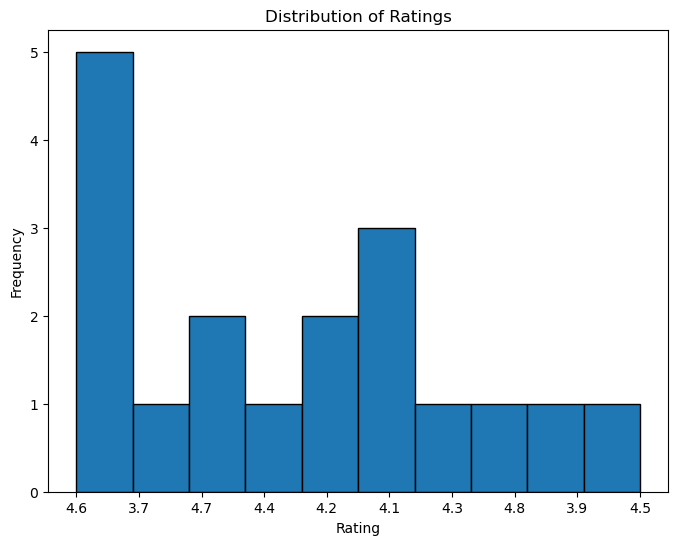

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

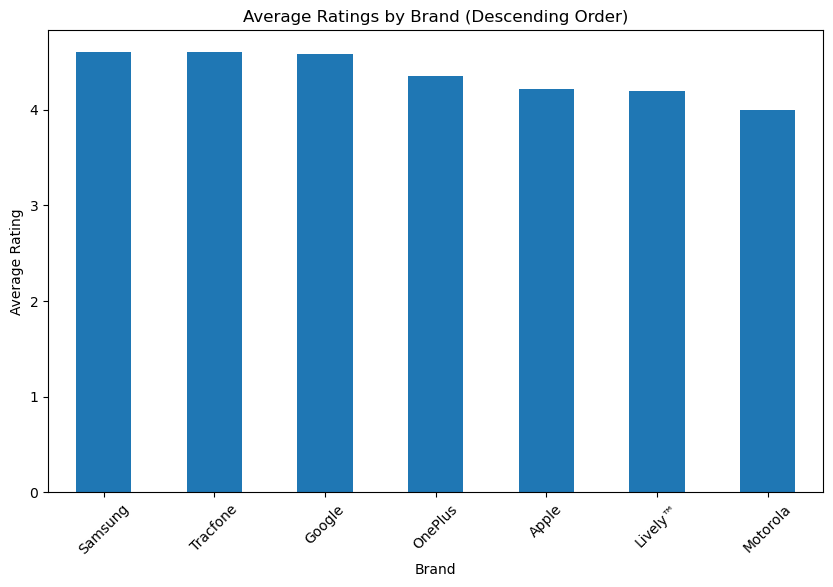

In [7]:
# Clean the 'Rating' column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group data by brand and calculate average rating
brand_ratings = df.groupby('Brand')['Rating'].mean()

# Sort the brand ratings in descending order
brand_ratings = brand_ratings.sort_values(ascending=False)

# Create a bar plot in descending order
plt.figure(figsize=(10, 6))
brand_ratings.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Brand (Descending Order)')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Filter the data for Apple brand
apple_df = df.loc[df['Brand'] == 'Apple'].copy()

# Convert 'Reviews' column to numeric
apple_df['Reviews'] = pd.to_numeric(apple_df['Reviews'], errors='coerce')

# Find the title with the highest reviews count
most_rated_title = apple_df.loc[apple_df['Reviews'].idxmax(), 'Title']

print("Most Rated Title under Apple Brand:", most_rated_title)


Most Rated Title under Apple Brand: Pre-Owned iPhone XR 64GB (Unlocked) - Black


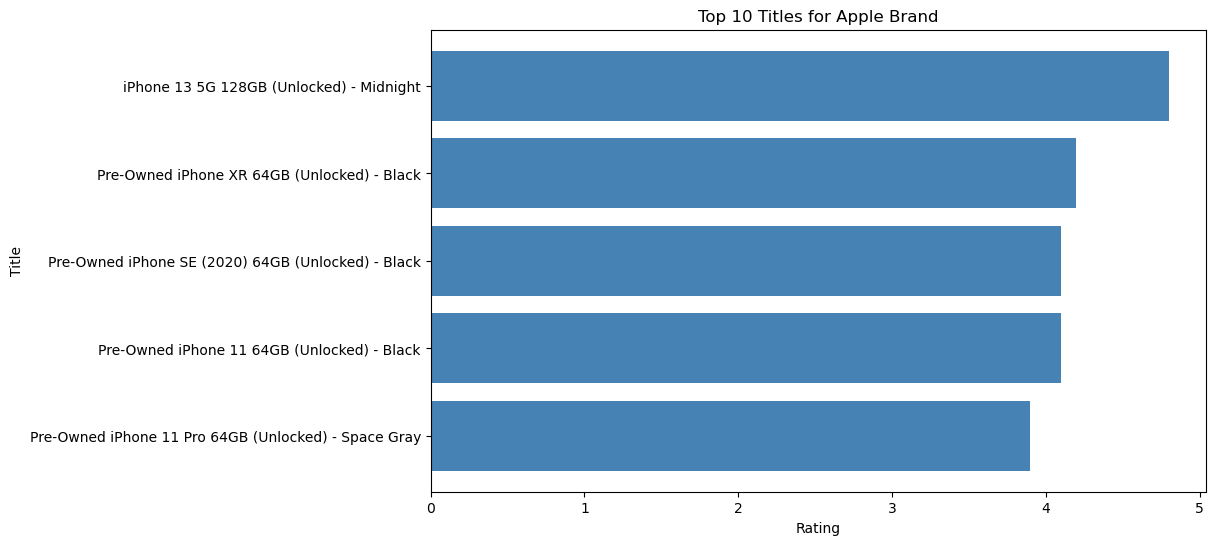

In [11]:
# Sort the Apple DataFrame by rating in descending order
sorted_apple_df = apple_df.sort_values(by='Rating', ascending=False)

# Select the top 10 titles
top_10_titles = sorted_apple_df.head(10)['Title']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_titles, sorted_apple_df.head(10)['Rating'], color='steelblue')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 10 Titles for Apple Brand')
plt.gca().invert_yaxis()
plt.show()


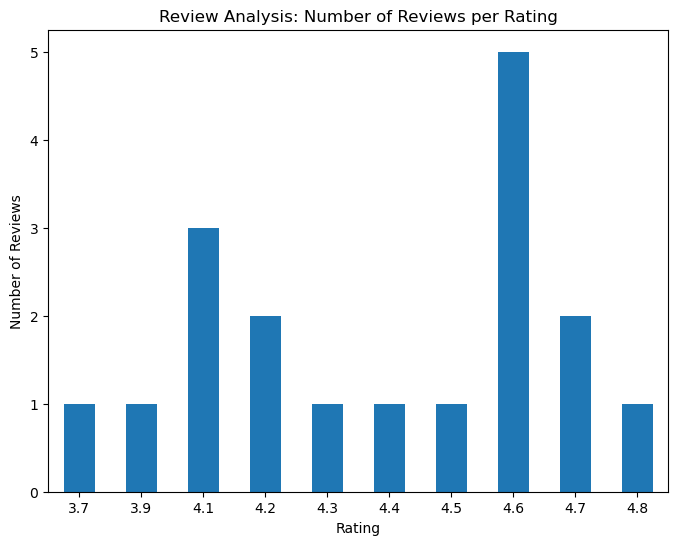

In [12]:
# Group data by rating and calculate the count of reviews
rating_counts = df.groupby('Rating')['Reviews'].count()

# Create a bar plot
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Review Analysis: Number of Reviews per Rating')
plt.xticks(rotation=0)
plt.show()


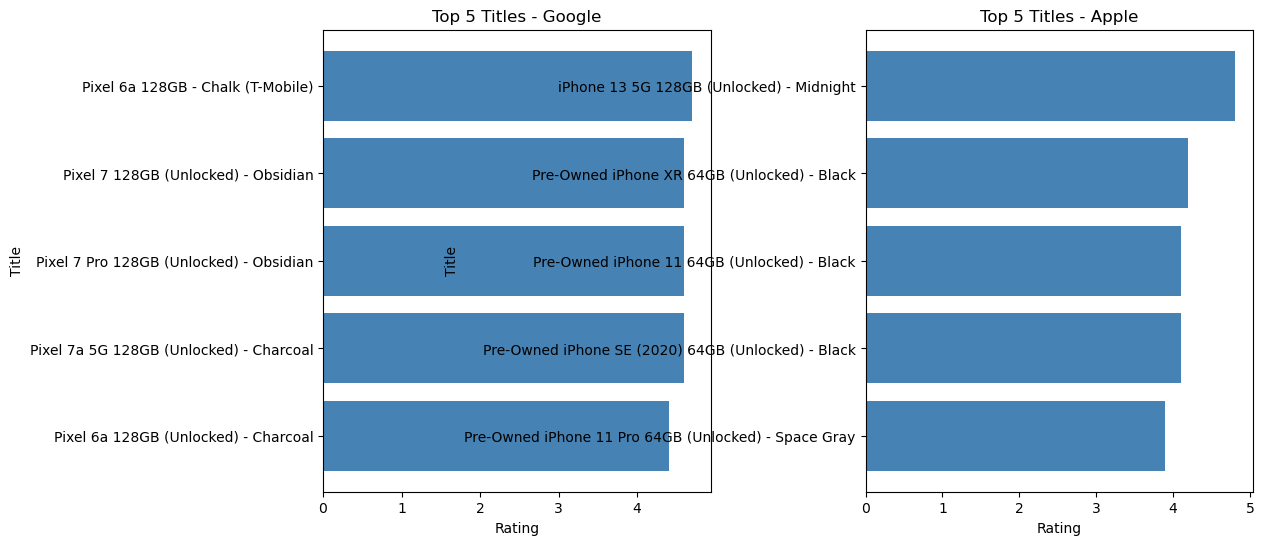

In [15]:
# Convert 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Filter the data for Google and Apple brands
google_df = df[df['Brand'] == 'Google'].nlargest(5, 'Reviews').sort_values('Rating', ascending=False)
apple_df = df[df['Brand'] == 'Apple'].nlargest(5, 'Reviews').sort_values('Rating', ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Google
ax1.barh(google_df['Title'], google_df['Rating'], color='steelblue')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Title')
ax1.set_title('Top 5 Titles - Google')
ax1.invert_yaxis()

# Plot for Apple
ax2.barh(apple_df['Title'], apple_df['Rating'], color='steelblue')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Title')
ax2.set_title('Top 5 Titles - Apple')
ax2.invert_yaxis()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


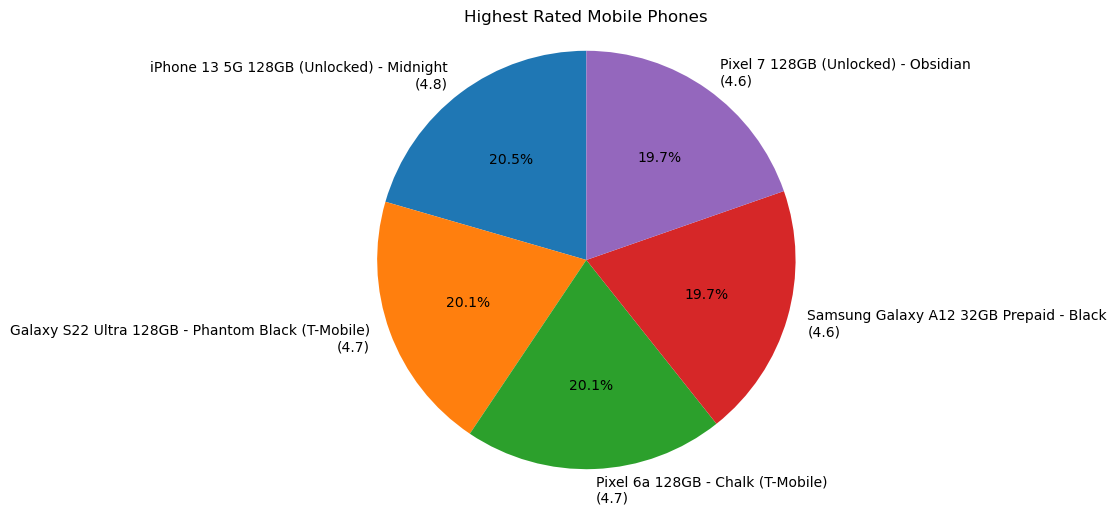

In [21]:
# Filter the data for highest rated mobile phones
highest_rated = df.nlargest(5, 'Rating')

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(highest_rated['Rating'], labels=[f'{title}\n({rating:.1f})' for title, rating in zip(highest_rated['Title'], highest_rated['Rating'])], autopct='%1.1f%%', startangle=90)
plt.title('Highest Rated Mobile Phones')
plt.axis('equal')

plt.show()
